### End to End Multiclass Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using Tensorflow 2.0 and Tensorflow Hub

#### 1. Problem
Identify the breed of the dog given an image

When you are sitting in a cafe and you take a pic of dog, you need to know the breed of the dog.

#### 2. Data
The data we are using is from Kaggle Dog Breed Competition

https://www.kaggle.com/competitions/dog-breed-identification/data

#### 3. Evaluation
The evaluation is the file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

#### 4. Features
Some information about the data:
* We are dealing with images (unstructed data), so its best we use deep learning/ transfer learning.
* There are 120 breeds of dogs
* There are around 10000+ images in training and testing set.

## Get our Workspace Ready
* Import Tensorflow
* Import Tensorflow Hub

In [1]:
import tensorflow as tf

In [2]:
print("Tf version: ", tf.__version__)

Tf version:  2.18.0


In [3]:
import tensorflow_hub as hub
print("tensorflow_hub version: ", hub.__version__)


tensorflow_hub version:  0.16.1


## Getting our data ready

With all machine learning models, our data has to be in a numerical format. So turning our images into tensors (numerical representations).

Lets start by accessing our data and checking out labels

In [4]:
import pandas as pd
labels_csv = pd.read_csv("labels.csv")
print(labels_csv.describe())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


<Axes: xlabel='breed'>

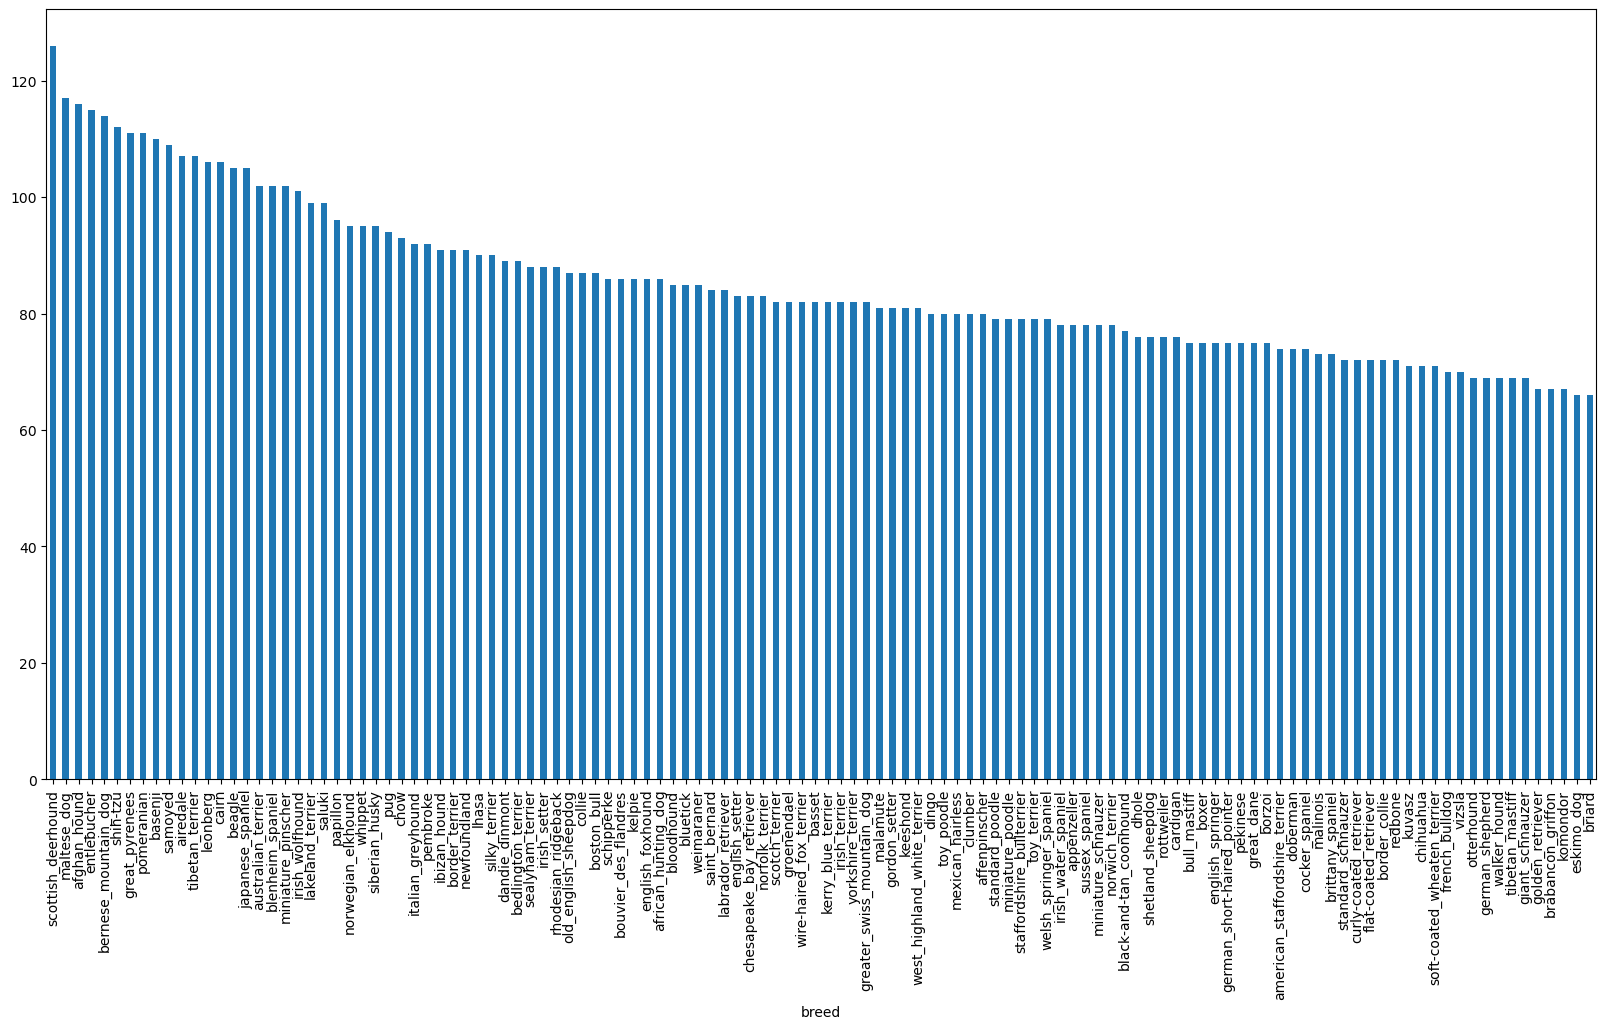

In [5]:
# How many images of each class

labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

In [6]:
# Lets take the average images per breed

labels_csv["breed"].value_counts().median() # 82
labels_csv["breed"].value_counts().mean() # 85.1833


85.18333333333334

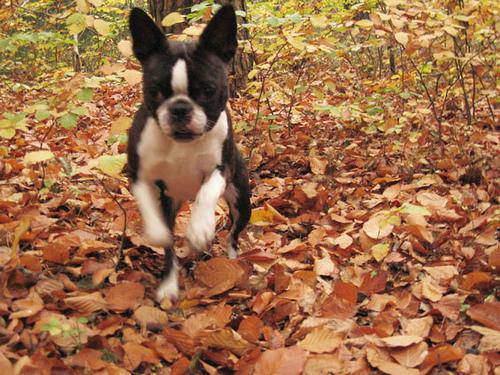

In [7]:
# Lets view an Image

from IPython.display import Image
Image("train/000bec180eb18c7604dcecc8fe0dba07.jpg")


## Getting Images and their Labels

Lets get a list of all our image pathnames

In [8]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [9]:
# Create pathnames from Image Ids
filenames = [fname for fname in labels_csv["id"]]

# filenames

filenames = ["train/" + fname for fname in labels_csv["id"] + ".jpg"]

filenames[:10]

['train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'train/001cdf01b096e06d78e9e5112d419397.jpg',
 'train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'train/002a283a315af96eaea0e28e7163b21b.jpg',
 'train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [10]:
# Check whether no of filenames equals number of actual image files

import os

if len(os.listdir("train/")) == len(filenames):
    print("Proceed!!!")
else:
    print("Stop!!")

Proceed!!!


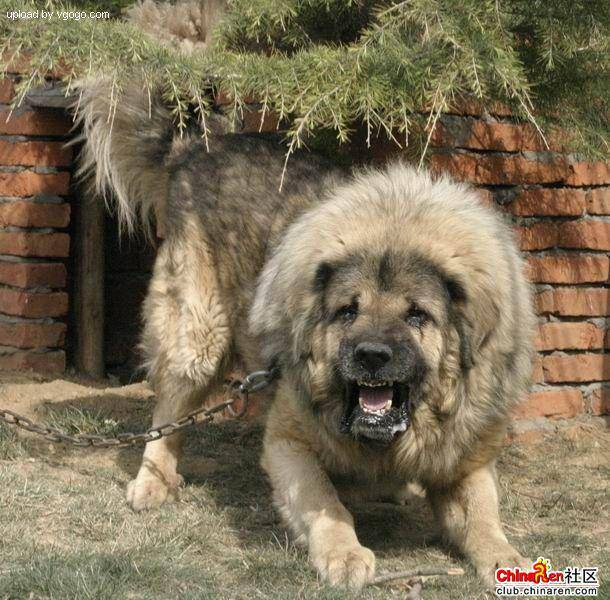

In [11]:
# One more Check
Image(filenames[9000])

Since we have got our training images into filepaths in a list, lets prepare the labels

In [12]:
import numpy as np

labels = labels_csv["breed"]
labels = np.array(labels)
print(labels, len(labels))

['boston_bull' 'dingo' 'pekinese' ... 'airedale' 'miniature_pinscher'
 'chesapeake_bay_retriever'] 10222


In [13]:
# See if number of labels matches the number of filenames

if len(labels) == len(filenames):
    print("Proceed !!!")
else:
    print("Stop!")

Proceed !!!


In [14]:
# Find the Unique label values

unique_breeds = np.unique(labels)
print(unique_breeds, len(unique_breeds))

['affenpinscher' 'afghan_hound' 'african_hunting_dog' 'airedale'
 'american_staffordshire_terrier' 'appenzeller' 'australian_terrier'
 'basenji' 'basset' 'beagle' 'bedlington_terrier' 'bernese_mountain_dog'
 'black-and-tan_coonhound' 'blenheim_spaniel' 'bloodhound' 'bluetick'
 'border_collie' 'border_terrier' 'borzoi' 'boston_bull'
 'bouvier_des_flandres' 'boxer' 'brabancon_griffon' 'briard'
 'brittany_spaniel' 'bull_mastiff' 'cairn' 'cardigan'
 'chesapeake_bay_retriever' 'chihuahua' 'chow' 'clumber' 'cocker_spaniel'
 'collie' 'curly-coated_retriever' 'dandie_dinmont' 'dhole' 'dingo'
 'doberman' 'english_foxhound' 'english_setter' 'english_springer'
 'entlebucher' 'eskimo_dog' 'flat-coated_retriever' 'french_bulldog'
 'german_shepherd' 'german_short-haired_pointer' 'giant_schnauzer'
 'golden_retriever' 'gordon_setter' 'great_dane' 'great_pyrenees'
 'greater_swiss_mountain_dog' 'groenendael' 'ibizan_hound' 'irish_setter'
 'irish_terrier' 'irish_water_spaniel' 'irish_wolfhound'
 'italian

In [15]:
# Turn a single label into array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [16]:
# Turn every label into boolean arrays

boolean_labels = [label == unique_breeds for label in labels]
len(boolean_labels) # 10222
boolean_labels[:2]


[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [17]:
# Example: Turning Boolean Array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be 1 where the sample label occurs

boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [18]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Creating our own validation set

Since the dataset doesn't contain validation set, we're going to create our own

In [19]:
# Setup x and y variables

x = filenames
y = boolean_labels

We are going to start off experimenting ~1000 images and increase as we need

In [20]:
# Set number of images to use for experimenting

NUM_IMAGES = 1000 

# Let's split our data into train and validation state
from sklearn.model_selection import train_test_split

# np.random.seed(42)

# Split them into two different sets (training and validation)
X_train, X_val, Y_train, Y_val = train_test_split(x[:NUM_IMAGES], y[:NUM_IMAGES], test_size = 0.2, random_state = 42)

len(X_train), len(X_val), len(Y_train), len(Y_val)

(800, 200, 800, 200)

In [21]:
# Lets have a geez at training data
X_train[:5], Y_train[:2]

(['train/00bee065dcec471f26394855c5c2f3de.jpg',
  'train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, Fa

## Preprocessing Images (turning images into tensors)

To preprocess our images into Tensors we are going to write a function which does a few things:
1. Take an image filepath as an input
2. Use Tensorflow to read and save it to a variable, `image`
3. Turn our `image` into Tensors
4. Resize the `image` to be a shape of (224, 224)
5. Return the modified image 

In [22]:
# Convert an image to numpy array
from matplotlib.pyplot import imread

image = imread(filenames[42])

# Check the shape of the image
image.shape

(257, 350, 3)

In [23]:
# Create a constant tensor into a tensor like object


# Turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

Now we've seen what an image looks like a Tensor, let's make a function to preprocess them

In [24]:
# Define Image Size
IMAGE_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path):
    # Read an image file
    image = tf.io.read_file(image_path)

    # Turn the jpeg image into numerical tensor with 3 color channels
    image = tf.io.decode_jpeg(image, channels=3)

    # Convert the colour channels values from 0-255 to 0-1
    image = tf.image.convert_image_dtype(image, tf.float32)

    # Resize the image to our desired value (224)
    image = tf.image.resize(image, size=[IMAGE_SIZE, IMAGE_SIZE])

    return image


## Turning our data into batches

Why turn data into batches??

Lets say you're trying to process 10000+ images in one go..., they might not fit in memory

So thats why we do about 32 (this is the batch size) images at a time (we can manually adjust the size if needed).

In order to use Tensorflow effectively, we need our data in the form of Tensor Tuples which look like this: `(image, label)`

In [25]:
# Create a simple function to return a tuple (image, label)

def get_image_label(image_path, label):
    # Process the image
    image = process_image(image_path)
    return image, label

In [26]:
# Demo of the above

(process_image(x[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we have got a way to turn our images into tuples of the form: `(image, label)`

lets make a function to turn all of our data (`x`, `y`) into batches


In [27]:
# Define the batch size, 32 is a good start

BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y = None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
    # Create batches of data (x) and label (y) pairs
    # Shuffles the data if its training data but doesn't shuffle if its validation data
    # Also accept test data as input (no labels)


    # If the data is test dataset
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # Only filepaths (no labels)
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    
    # If the data is a valid dataset, we don't need to shuffle it
    elif valid_data:
        print("Creating valid data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y))) # filepaths, labels
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    
    else:
        print("Creating training data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y))) # filepaths, labels
        # Shuffling pathnames and labels before mapping image processor functions is faster than shuffling images
        data = data.shuffle(buffer_size=len(x))

        # Create (image, label) tuples, also turns image path into preprocessed image
        data = data.map(get_image_label)

        # Turn the training data into batches
        data_batch = data.batch(batch_size=BATCH_SIZE)
        return data_batch

In [28]:
# Creating training and validation data batches

train_data = create_data_batches(X_train, Y_train)
val_data = create_data_batches(X_val, Y_val, valid_data=True)

Creating training data batches...
Creating valid data batches...


In [29]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our data is now in batches, but those can be a little hard to comprehend, 

Lets visualize our data...

In [30]:
import matplotlib.pyplot as plt

# Create a function for viewing images in our data batch
def show_25_images(images, labels):
    # Displays a plot of 25 images and their labels

    # Setup the figure
    plt.figure(figsize=(10, 10))

    # Loop through 25 to display 25 images
    for i in range(25):
        # Create subplots (5 rows, 5 columns)
        ax = plt.subplot(5, 5, i + 1)
        # Display an image
        plt.imshow(images[i])
        # Add the image label as title
        plt.title(unique_breeds[labels[i].argmax()])
        # Turn the grid lines off
        plt.axis("off")


In [31]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [32]:
train_images, train_labels = next(train_data.as_numpy_iterator())

len(train_images), len(train_labels)

(32, 32)

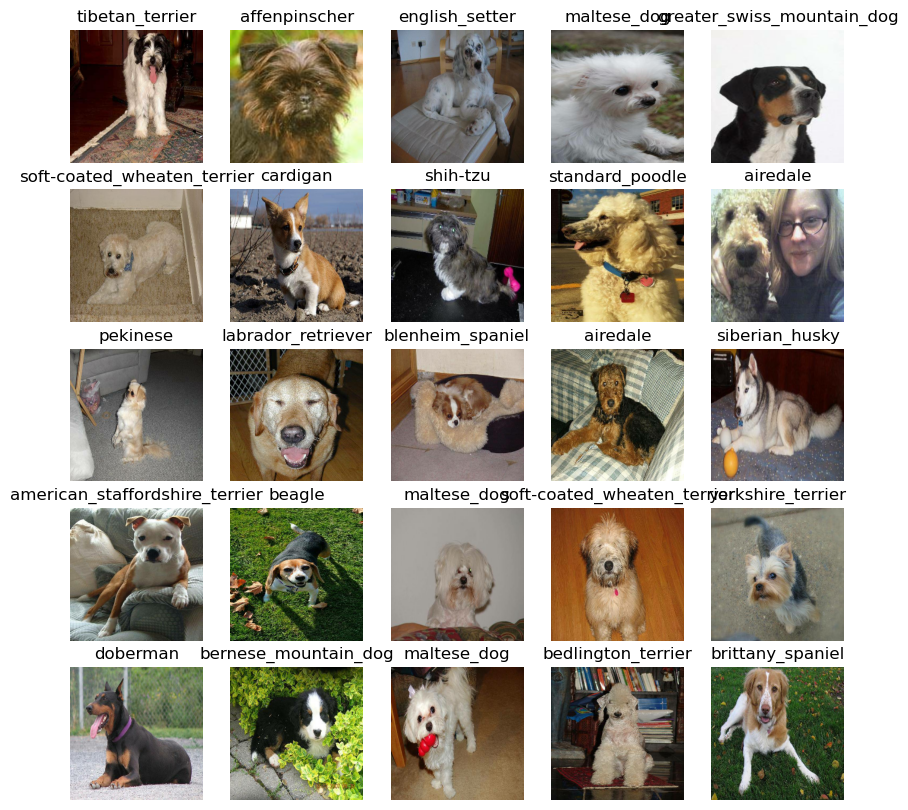

In [33]:
# Now let's visualize the data in a training batch
show_25_images(train_images, train_labels)

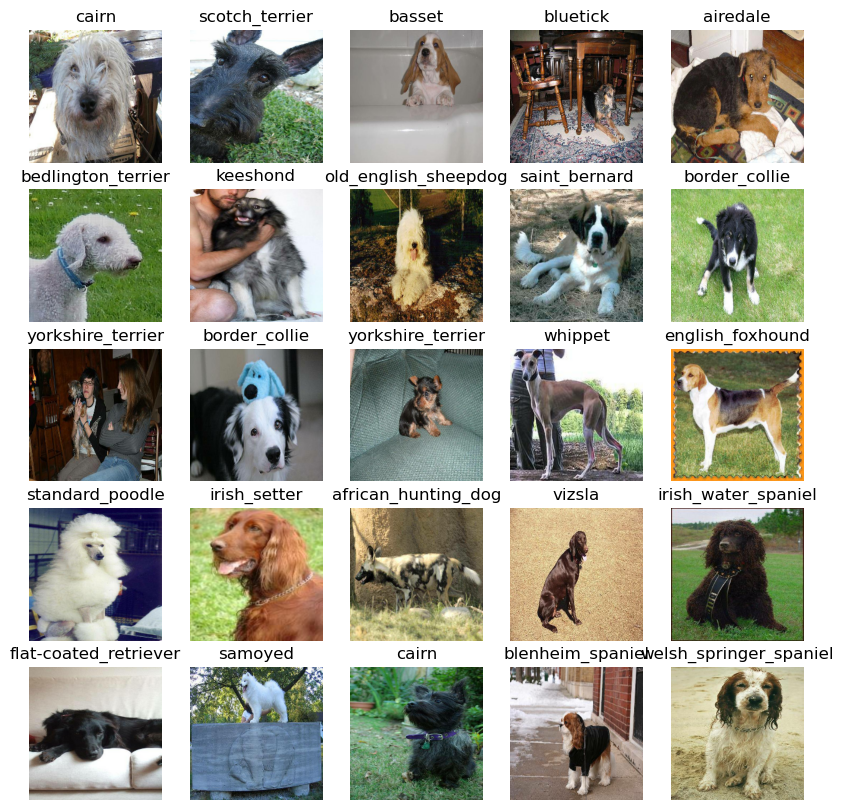

In [34]:
validation_images, validation_labels = next(val_data.as_numpy_iterator())

# Now let's visualize the data in a validation batch
show_25_images(validation_images, validation_labels)

## Building a model

Before we build a model, there are a few things we need to define:

* The input shape (our images shape, in form of Tensors) to our model
* The output shape (image labels, in form of Tensors) to our model
* The URL of the model we want to use from Tensorflow Hub - https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1

In [41]:
# Setup input shape to our model
INPUT_SHAPE = [None, IMAGE_SIZE, IMAGE_SIZE, 3] # batch, height, width, color channels

# Setup the output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from Tensorflow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/5"


Now we got our inputs, outputs and model ready to go...

Put them into Keras deep learning model...


Lets Create a function where:
* It takes input shape, output shape and model we have chosen as parameters
* Defines the layers in Keras model in a Sequential fashion
* Compile some model (says it should be evaluated and improved)
* Builds the model (tells the model the input shape it will be getting)
* Returns the model

In [42]:
%pip install tf_keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import tf_keras

In [46]:
# Create a function which builds a Keras model

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print("Building model with: ", model_url)

    # Setup the model layers
    model = tf_keras.Sequential([
        hub.KerasLayer(MODEL_URL),  # ✅ Fixed argument order
        tf_keras.layers.Dense(units=output_shape, activation="softmax"),
    ])

    # Compile the model
    model.compile(
        loss=tf_keras.losses.CategoricalCrossentropy(),
        optimizer=tf_keras.optimizers.Adam(),
        metrics=["accuracy"]
    )

    # Build the model
    model.build(INPUT_SHAPE)

    return model


In [47]:
model = create_model()

model.summary()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/5



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 3660505 (13.96 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


## Creating Callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stops training early if the model stops improving.

We will create two callbacks, one for Tensorboard which helps trach our models progress and another for early stopping which prevents our model for training too long.

### Tensorflow callback

To setup a TensorBoard callback, we need to do 3 things:
1. Load the Tensorboard notebook extension
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our models `fit()` function
3. Visualize our models training logs, with the `%tensorboard` magic function (we'll do this after model training)

In [48]:
# Load tensorboard notebook extension

%load_ext tensorboard

In [49]:
from datetime import datetime
import os

def create_tensorboard_callback():
    # Create a timestamp without invalid characters
    log_dir = os.path.join("logs", datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = tf_keras.callbacks.TensorBoard(log_dir=log_dir)
    return tensorboard_callback

## Early Stopping Callback

Early stopping helps stop our model from overfitting when a certain model metric stops improving

In [50]:
## Create early stopping callback

early_stopping = tf_keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

### Training our model (on a subset of data)

Our first model is only going to train on 1000 images, to make sure everything is working

In [51]:
NUM_EPOCHS = 100 # Number of epochs is no. of passes of the data we'd like our model to do

Let's create a function which trains our model:

* The function will create a model using `create_model()`
* Setup a Tensorboard Callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model, passing the training data, validation data, number of epochs, callbacks we'd like to use
* Return the model

In [52]:
# Build a function to train and return a trained model

def train_model():
    # Create a model
    model = create_model()

    # Create new Tensorboard session each time we train a model
    tensorboard = create_tensorboard_callback()

    # Fit the model to the data, passing in the callbacks we created
    model.fit(x=train_data, epochs=NUM_EPOCHS, validation_data=val_data, validation_freq=1, callbacks=[tensorboard, early_stopping])

    return model

In [53]:
# Fit the model to the data
model = train_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/5
Epoch 1/100



25/25 [==============================] - 17s 497ms/step - loss: 4.4596 - accuracy: 0.1213 - val_loss: 3.4279 - val_accuracy: 0.2550
Epoch 2/100
25/25 [==============================] - 10s 390ms/step - loss: 1.4773 - accuracy: 0.7163 - val_loss: 2.1909 - val_accuracy: 0.4600
Epoch 3/100
25/25 [==============================] - 9s 381ms/step - loss: 0.5061 - accuracy: 0.9488 - val_loss: 1.7130 - val_accuracy: 0.5700
Epoch 4/100
25/25 [==============================] - 9s 376ms/step - loss: 0.2204 - accuracy: 0.9900 - val_loss: 1.5527 - val_accuracy: 0.5950
Epoch 5/100
25/25 [==============================] - 9s 376ms/step - loss: 0.1297 - accuracy: 0.9962 - val_loss: 1.4610 - val_accuracy: 0.6150
Epoch 6/100
25/25 [==============================] - 10s 388ms/step - loss: 0.0884 - accuracy: 0.9987 - val_loss: 1.4284 - val_accuracy: 0.6250
Epoch 7/100
25/25 [==============================] - 9s 380ms/step - loss: 0.0677 - accuracy: 1.0000 - val_loss: 1.3961 - val_accuracy: 0.6400
Epoch 8/

### Making and evaluating predictions through a trained model


In [54]:
# Make predictions on validation data (not used to train on)

predictions = model.predict(val_data, verbose = 1)
predictions

7/7 [==============================] - 2s 261ms/step


array([[1.78960513e-03, 4.12088324e-04, 1.56671391e-04, ...,
        9.51950788e-04, 6.07309194e-05, 1.27883116e-03],
       [6.19394646e-04, 1.51462201e-03, 2.10633152e-03, ...,
        1.07422944e-04, 6.39648759e-04, 2.82852707e-05],
       [6.71600719e-06, 3.19143037e-05, 2.31439015e-04, ...,
        9.37254372e-05, 2.07723613e-04, 3.83972586e-03],
       ...,
       [1.39612857e-05, 2.09783189e-04, 1.18751586e-05, ...,
        4.52194445e-06, 7.81935232e-05, 3.97794392e-05],
       [4.15726128e-04, 3.09998131e-06, 4.72199645e-06, ...,
        3.14339513e-06, 3.55418524e-05, 2.16325885e-03],
       [2.71841534e-04, 2.31233607e-05, 1.85853452e-04, ...,
        1.10094650e-02, 4.71355597e-04, 1.58662698e-03]], dtype=float32)

In [55]:
# The probability of every unique breed to be the label of the given image at index 0
predictions[0]

array([1.7896051e-03, 4.1208832e-04, 1.5667139e-04, 3.1783211e-04,
       3.9241393e-03, 3.7638718e-04, 4.8378534e-03, 6.4595934e-04,
       1.2398680e-03, 9.1396381e-05, 8.0871185e-05, 1.3573503e-03,
       4.3005651e-04, 3.5562270e-04, 1.6634791e-04, 1.3575231e-03,
       1.0936538e-04, 3.9281748e-02, 1.2728648e-04, 2.5774908e-04,
       4.2000855e-03, 1.7206550e-03, 3.6058478e-05, 4.9566798e-04,
       5.1916682e-05, 1.8158124e-04, 2.5387013e-01, 8.5195956e-05,
       1.5039103e-04, 9.2711352e-04, 1.1669358e-03, 7.2923750e-03,
       1.4503559e-04, 1.2166849e-04, 3.0772295e-05, 1.4005012e-02,
       6.3409781e-05, 2.2540712e-04, 3.3438674e-03, 1.2288234e-03,
       2.9620546e-04, 4.1148403e-05, 5.9162667e-05, 2.1991725e-03,
       3.5888323e-04, 1.1196034e-03, 1.7207199e-04, 8.5345574e-04,
       1.1586648e-03, 1.3444999e-03, 4.1400912e-05, 2.2483183e-04,
       6.7284994e-04, 6.6178158e-04, 3.4640212e-05, 2.4910491e-05,
       6.1513689e-05, 4.4142187e-04, 1.8660835e-03, 2.5534252e

In [56]:
print(predictions[40])
print(f"Max value (probability of predictions): {np.max(predictions[40])}")
print(f"Max value index (probability of predictions): {np.argmax(predictions[40])}")
print(f"Predicted Label: {unique_breeds[np.argmax(predictions[40])]}")

[1.07432701e-04 5.69807617e-06 9.62362246e-05 7.87148892e-05
 1.10642174e-02 1.91070169e-04 1.08655353e-04 9.39311067e-05
 1.94718508e-04 4.91671497e-04 3.88787594e-04 4.02457168e-04
 2.16840068e-03 5.74845180e-05 7.05454848e-04 4.72998618e-05
 4.80707182e-04 4.48871957e-04 5.37784763e-06 2.67915602e-05
 5.47164200e-05 3.99326154e-06 1.05663730e-05 7.24420752e-05
 1.43276600e-04 1.22528814e-03 3.70443740e-06 2.03511678e-03
 2.90319771e-02 1.41828088e-04 4.40731019e-05 4.28341955e-05
 1.84278688e-05 3.11389485e-05 3.79688630e-04 1.39655003e-05
 1.01939659e-04 4.76391178e-05 6.26716646e-04 1.80278337e-04
 1.87926739e-03 6.36386612e-05 7.55959947e-04 1.04078194e-04
 1.56673416e-01 3.09380230e-05 4.13234404e-04 1.52581534e-03
 9.15989222e-04 3.54450895e-03 1.06179854e-04 1.92123916e-04
 3.36263154e-04 3.08167888e-04 2.94212776e-04 4.92316540e-05
 6.56723059e-05 2.32057846e-05 3.98370845e-04 9.85039398e-04
 1.53106575e-05 4.39456380e-05 1.09689881e-05 1.55138929e-04
 9.14527027e-06 1.792482

Having the above functionality is great, but we need to do this at a larger scale.

It would be better if we are able to the see the image we are predicting on!!

**Note:** Prediction Probabilities are also known as confidence levels.

In [64]:
# Turn the prediction probabilities into their respective labels (easier to understand)
def get_pred_labels(prediction_probabilities):
    return unique_breeds[np.argmax(prediction_probabilities)]


# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_labels(predictions[80])
pred_label


'pekinese'

So now, since our validation data is still in a batch dataset, we'll have to unbatchify it to make the predictions on the validation images and then compare thode predictions to the validation labels (truth labels)

In [65]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [66]:

images_ = []
labels_ = []

for image, label in val_data.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(label)

images_[0], labels_[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [67]:
get_pred_labels(labels_[0])

'cairn'

In [68]:
get_pred_labels(predictions[0])

'cairn'

In [74]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
    images = []
    labels = []
    # Loop through unbatched data
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])

    return images, labels

# Unbatchify the validation data

val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [75]:
get_pred_labels(val_images[0])

'vizsla'

Now we have got ways to get:
* Prediction Labels
* Validation Labels (truth labels)
* Validation Images

Lets make a function to make all these a bit more visual.

We'll create a function which:
* Takes an array of prediction probabilities, an array of truth labels, an array of images and integers
* Convert the prediction probabilities to a predicted label
* Plot the predicted label, its predicted probability, the truth label and a target image on a single plot.

In [79]:
def plot_preds(prediction_probabilities, labels, images, n = 1):
    """
    View the prediction, ground truth and image for a sample n
    """
    pred_prob, truth_label, image = prediction_probabilities[n], labels[n], images[n]

    # Get the pred label
    pred_label = get_pred_labels(pred_prob)

    # Plot the image and remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    # Change the color of the title depending if the prediction is right or wrong
    if pred_label == truth_label:
        color = "green"
    else:
        color = "red"

    # Change the plot title to be predicted, prediction probability and truth label
    plt.title("{} {:2.0f}% {}".format(pred_label, np.max(pred_prob) * 100, truth_label), color = color)

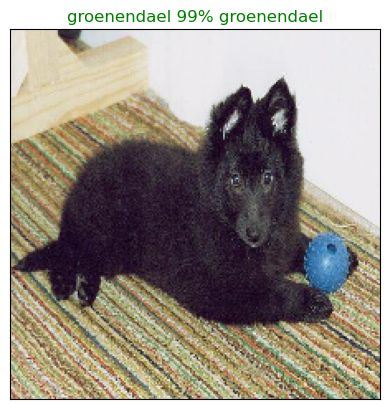

In [83]:
plot_preds(prediction_probabilities=predictions, labels= val_labels, images= val_images, n = 77)

Now we've got a function to view our model's top prediction, now let's make another to view our model's top 10 predictions

This function will:
* Take an input of prediction probabilities array, a groung truth array and an integer
* Find the prediction using `get_pred_label()`
* Find the top 10:
    * Prediction probabilities indexes
    * Prediction probabilities values
    * Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true labels green


In [93]:
def plot_pred_conf(prediction_probabilities, labels, n = 1):
    """
    Plot the top 10 highest prediction confidences along with truth label for sample n.
    """
    pred_prob, true_label = prediction_probabilities[n], labels[n]

    # Get the predicted labels
    pred_label = get_pred_labels(pred_prob)

    # Find the top 10 prediction confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
    # Find the top 10 prediction confidence values
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    # Find the top 10 prediction labels
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]

    # Setup the plot
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)), top_10_pred_values, color= "grey")
    plt.xticks(np.arange(len(top_10_pred_labels)), labels=top_10_pred_labels, rotation="vertical")

    # Change the color of true label
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(true_label == top_10_pred_labels)].set_color("green")
    else:
        pass


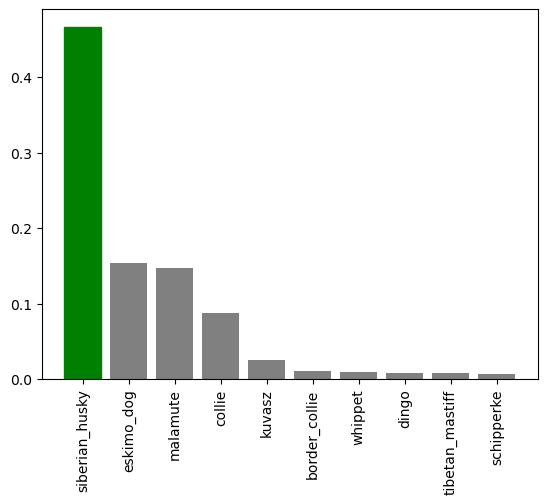

In [94]:
plot_pred_conf(prediction_probabilities=predictions, labels = val_labels, n = 85)

Now we have got some functions to visualize our predictions and evaluate our model, lets check out a few 

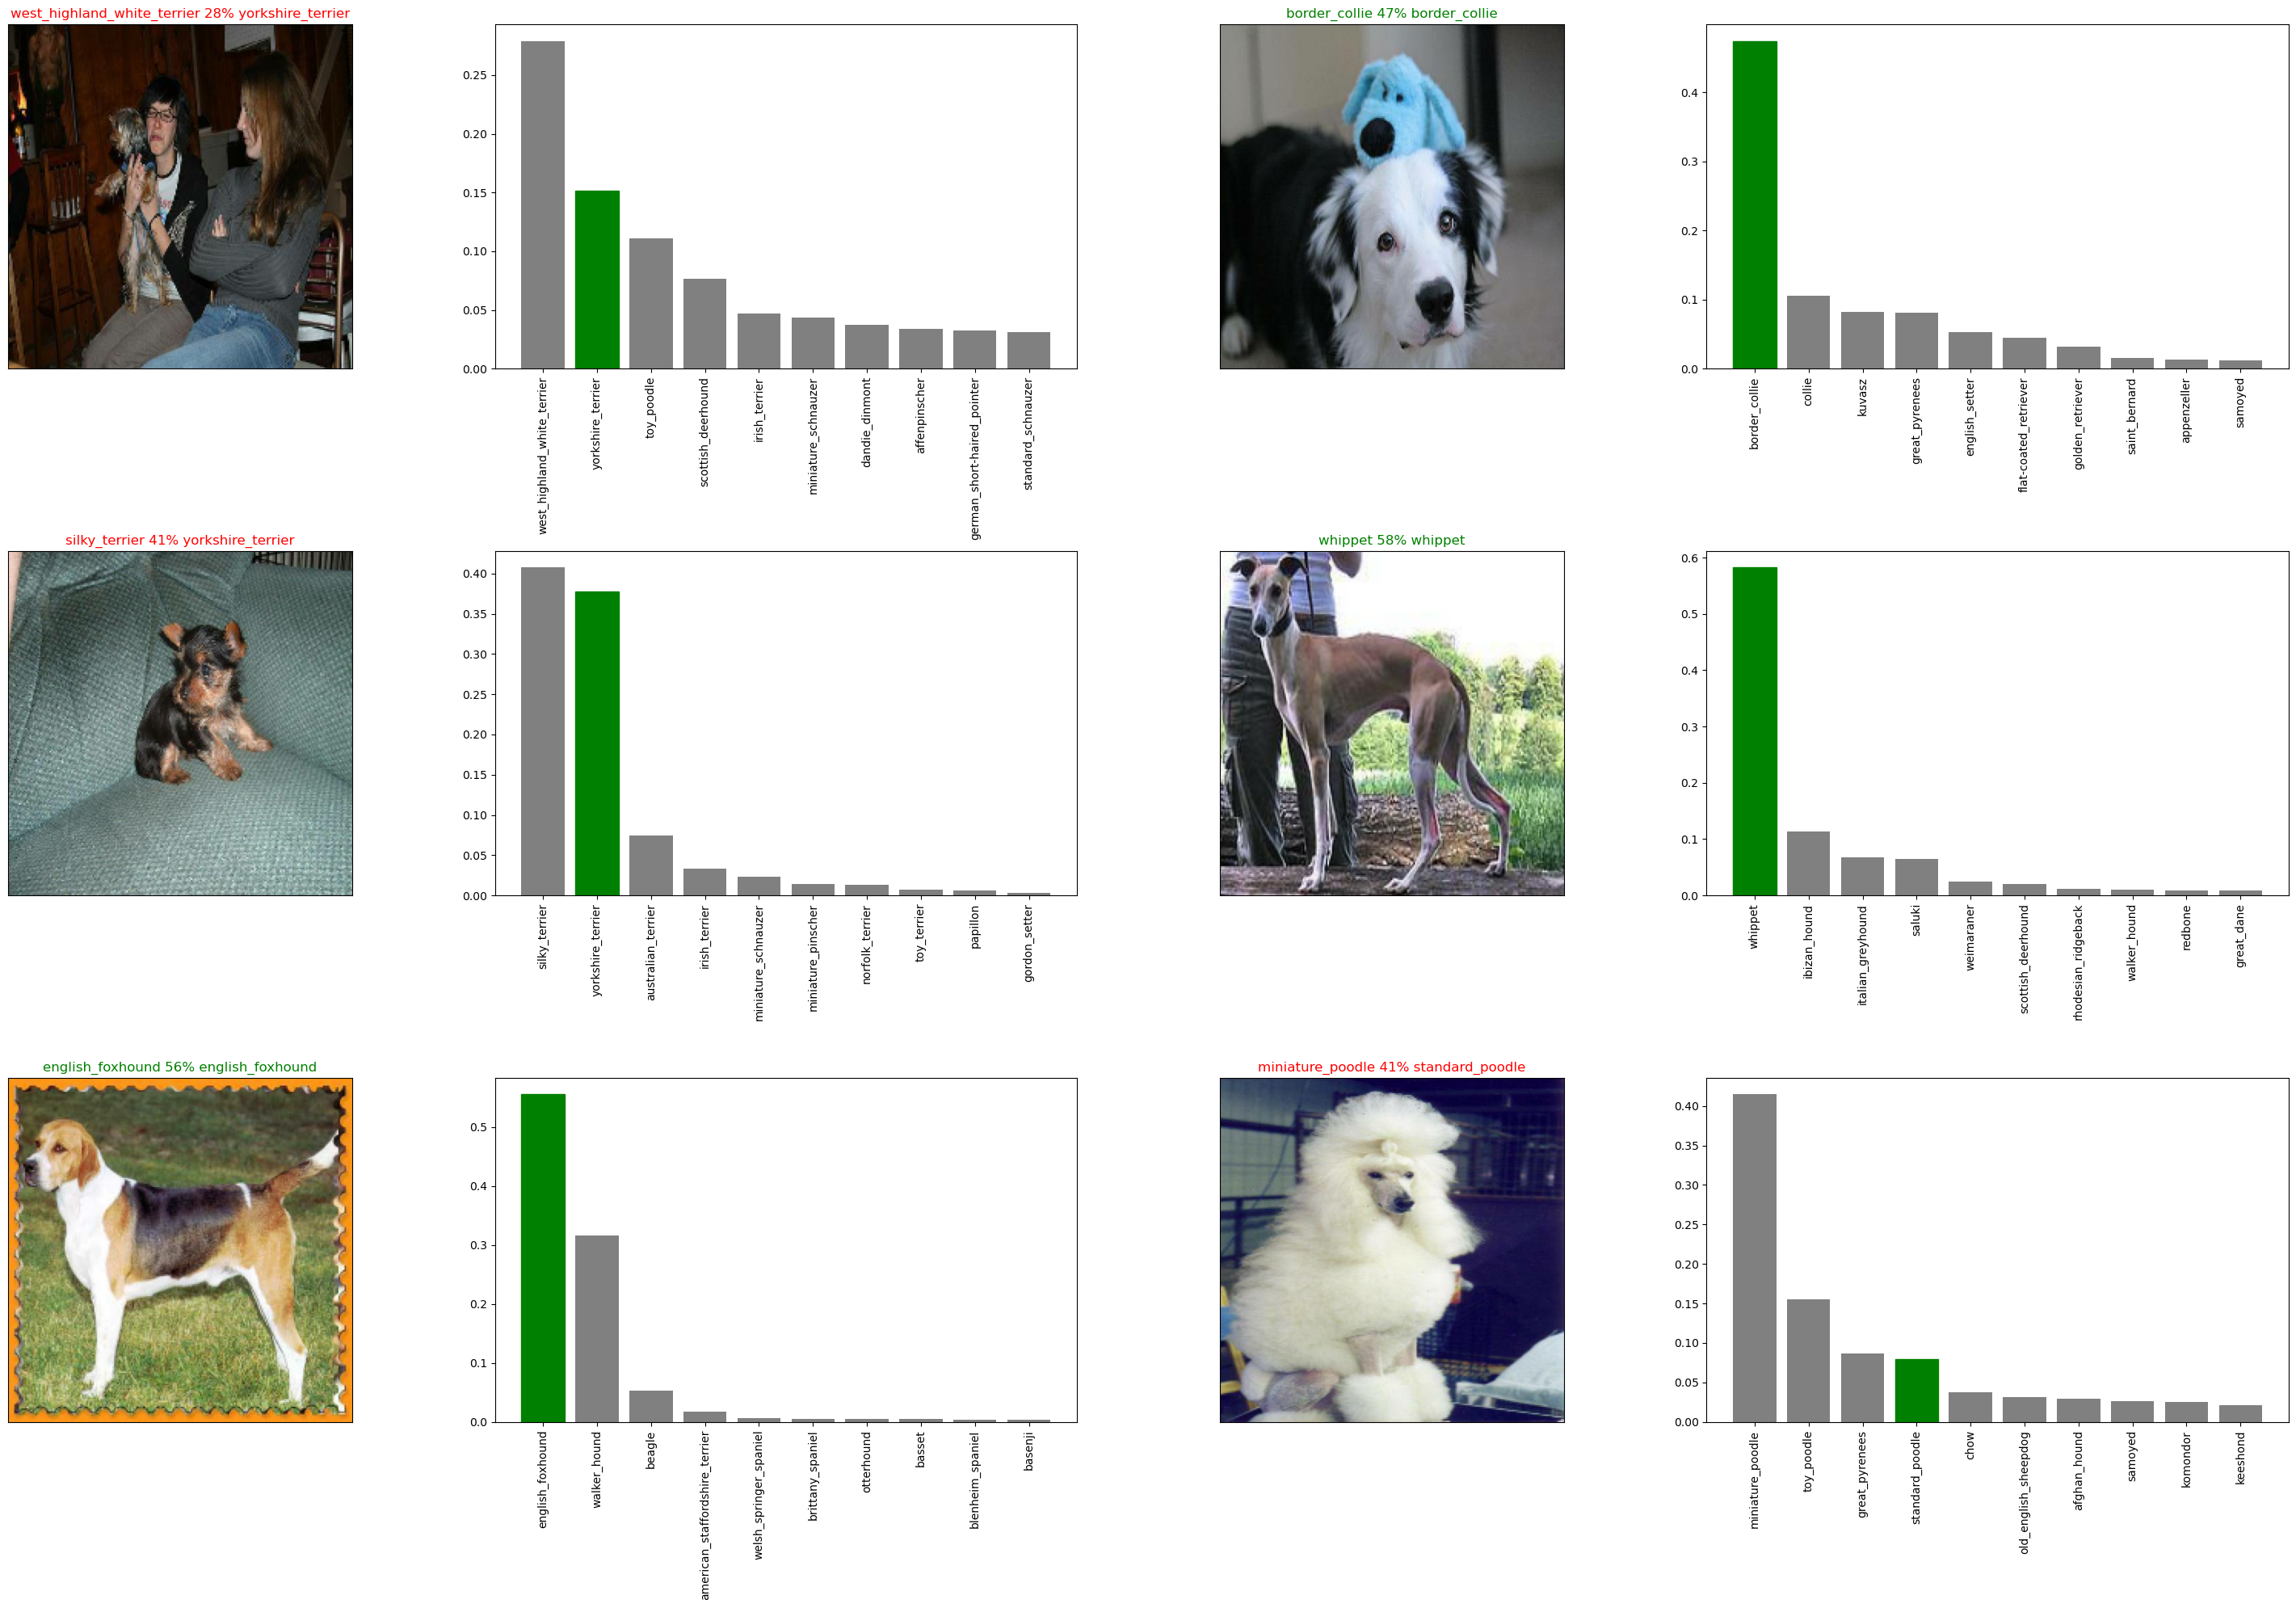

In [103]:
# Lets check out a few predictions and their different values

i_multiplier = 10
rows = 3
cols = 2
num_images = rows * cols
plt.figure(figsize=(10* rows, 10*cols))
for i in range(num_images):
    plt.subplot(rows,2*cols, 2*i+1)
    plot_preds(prediction_probabilities=predictions, labels=val_labels, images=val_images, n=i + i_multiplier)
    plt.subplot(rows,2*cols, 2*i+2)
    plot_pred_conf(prediction_probabilities=predictions, labels=val_labels, n=i + i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()



### Saving and Reloading a trained model

In [104]:
# Create a function to save a model
def save_model(model, suffix = None):
    # Create a model directory pathname with current time
    modeldir = os.path.join("models", datetime.now().strftime("%Y%m%d-%H%M%S"))
    modelpath = modeldir + suffix + ".h5" # Save format of model
    print(f"Saving model to: {modelpath}...")
    model.save(modelpath)
    print(f"Model saved...")
    return modelpath

In [108]:
# Create a function to load a trained model
def load_model(model_path):
    print(f"Loading saved model from: {model_path}...")
    model = tf_keras.models.load_model(model_path, 
                                       custom_objects={"KerasLayer": hub.KerasLayer})
    return model

Now we have got functions to save and load model, let's see if they work!

In [106]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-Adam")

Saving model to: models\20250728-2217371000-images-Adam.h5...


c:\Users\acer\OneDrive\Documents\pythons\sample_project_conda\env\Lib\site-packages\tf_keras\src\engine\training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved...


'models\\20250728-2217371000-images-Adam.h5'

In [109]:
# Load a trained model
loaded_1000_images_model = load_model("models\\20250728-2217371000-images-Adam.h5")

Loading saved model from: models\20250728-2217371000-images-Adam.h5...


In [110]:
# Evaluate the pre saved model
model.evaluate(val_data)

7/7 [==============================] - 2s 317ms/step - loss: 1.2954 - accuracy: 0.6650


[1.2954150438308716, 0.6650000214576721]

In [111]:
# Evaluate the loaded model
loaded_1000_images_model.evaluate(val_data)

7/7 [==============================] - 3s 309ms/step - loss: 1.2954 - accuracy: 0.6650


[1.2954150438308716, 0.6650000214576721]

## Training a big dog model (on a full data)

In [112]:
len(x), len(y)

(10222, 10222)

In [113]:
# Create a data batch with full data set

full_data = create_data_batches(x, y)

Creating training data batches...


In [114]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [115]:
# Create a model for full model

full_model = create_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/5


In [116]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()

# No validation set when training on full dataset, so we can't monitor validation accuracy
full_model_early_stoppings = tf_keras.callbacks.EarlyStopping(monitor="accuracy", patience=3)

In [117]:
# Fit the full model for full data
full_model.fit(x=full_data, epochs=NUM_EPOCHS, callbacks=[full_model_tensorboard, full_model_early_stoppings])

Epoch 1/100
320/320 [==============================] - 110s 311ms/step - loss: 1.2855 - accuracy: 0.6786
Epoch 2/100
320/320 [==============================] - 100s 312ms/step - loss: 0.3781 - accuracy: 0.8845
Epoch 3/100
320/320 [==============================] - 101s 317ms/step - loss: 0.2173 - accuracy: 0.9394
Epoch 4/100
320/320 [==============================] - 99s 310ms/step - loss: 0.1400 - accuracy: 0.9661
Epoch 5/100
320/320 [==============================] - 100s 311ms/step - loss: 0.0964 - accuracy: 0.9825
Epoch 6/100
320/320 [==============================] - 99s 309ms/step - loss: 0.0698 - accuracy: 0.9882
Epoch 7/100
320/320 [==============================] - 101s 315ms/step - loss: 0.0527 - accuracy: 0.9931
Epoch 8/100
320/320 [==============================] - 102s 319ms/step - loss: 0.0412 - accuracy: 0.9958
Epoch 9/100
320/320 [==============================] - 100s 311ms/step - loss: 0.0332 - accuracy: 0.9968
Epoch 10/100
320/320 [==============================] - 1

In [118]:
# Save the full dataset model

save_model(full_model, suffix="full-dataset-mobilenetv2-Adam")

Saving model to: models\20250728-232533full-dataset-mobilenetv2-Adam.h5...


c:\Users\acer\OneDrive\Documents\pythons\sample_project_conda\env\Lib\site-packages\tf_keras\src\engine\training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved...


'models\\20250728-232533full-dataset-mobilenetv2-Adam.h5'

In [119]:
loaded_full_model = load_model('models\\20250728-232533full-dataset-mobilenetv2-Adam.h5')

Loading saved model from: models\20250728-232533full-dataset-mobilenetv2-Adam.h5...


In [122]:
loaded_full_model.evaluate(full_data)

320/320 [==============================] - 99s 308ms/step - loss: 0.0078 - accuracy: 0.9994


[0.007817228324711323, 0.999413013458252]

## Making Predictions on the test dataset

Since our model has been trained on images in form of Tensor Batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created `create_data_batches()` earlier which can the list of filenames as input and cover them into Tensor batches.

To make predictions on the test data we'll:
* Get the test image filenames
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True`(since the data doesn't have labels)
* Make the predictions array by passing the test data batches to the `predict()` method on our model 

In [123]:
# Load test image filenames
test_path = "test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['test/000621fb3cbb32d8935728e48679680e.jpg',
 'test/00102ee9d8eb90812350685311fe5890.jpg',
 'test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'test/001a5f3114548acdefa3d4da05474c2e.jpg',
 'test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 'test/002c2a3117c2193b4d26400ce431eebd.jpg',
 'test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 'test/002f80396f1e3db687c5932d7978b196.jpg',
 'test/0036c6bcec6031be9e62a257b1c3c442.jpg']

In [124]:
len(test_filenames)

10357

In [125]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [126]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [127]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data, verbose=1)

324/324 [==============================] - 107s 327ms/step


In [134]:
# Save the predictions (Numpy array) to csv file (for access later)
np.savetxt("predictions/test_predictions.csv", test_predictions, delimiter=",")

In [135]:
# Load predictions (Numpy array) from csv file
test_predictions = np.loadtxt("predictions/test_predictions.csv", delimiter=",")
test_predictions

array([[4.02211814e-12, 3.49760831e-10, 1.52461117e-11, ...,
        1.43328762e-13, 8.03130951e-10, 9.00309516e-08],
       [9.61326485e-09, 6.29161237e-11, 1.93952840e-10, ...,
        1.66902769e-10, 5.61006019e-10, 1.17878901e-10],
       [5.81328943e-11, 9.91068646e-06, 4.95854226e-11, ...,
        1.04810949e-09, 4.38685477e-11, 8.62264427e-11],
       ...,
       [5.08537726e-11, 1.57426797e-11, 1.97722336e-08, ...,
        6.15766257e-11, 6.83741865e-12, 1.34739123e-10],
       [9.79961405e-05, 1.55956492e-08, 6.46631060e-09, ...,
        8.70034267e-09, 4.45316516e-07, 1.63796703e-05],
       [1.28919972e-10, 4.87587286e-08, 1.75447354e-07, ...,
        1.49367508e-04, 1.31023441e-07, 4.71927830e-10]])

In [137]:
test_predictions.shape

(10357, 120)

## Making Predictions on custom images

To make predictions on custom images, we'll:
* Get the filepaths of our own images
* Turn the filepaths into data batches using `create_data_batch()`. Since our custom images won't have labels, we set the `test_data` parameter to `True`
* Pass the custom image data batch to our model's `predict()` method
* Convert the prediction output probabilities to prediction labels
* Compare the predicted labels to custom images

In [168]:
custom_path = "my_dogs/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)] 

In [169]:
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [170]:
# Make predictions on custom data
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 0s 139ms/step


In [171]:
custom_preds.shape

(2, 120)

In [172]:
# Get custom image prediction labels

custom_pred_labels = [get_pred_labels(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['boston_bull', 'ibizan_hound']

In [173]:
custom_images = []

for image in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(image)


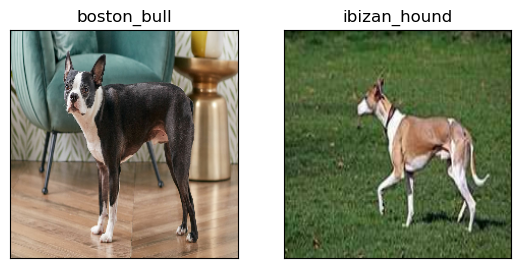

In [174]:
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
    plt.subplot(1, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_pred_labels[i])
    plt.imshow(image)
plt.show()